# Intro to TensorFlow

This notebook covers the basics of TF and shows you an animation with gradient descent trajectory.
<img src="https://github.com/hse-aml/intro-to-dl/blob/master/week2/v2/images/gradient_descent.png?raw=1" style="width:50%">

# TensorBoard

**Plase note that if you are running on the Coursera platform, you won't be able to access the tensorboard instance due to the network setup there.**

Run `tensorboard --logdir=./tensorboard_logs --port=7007` in bash.

If you run the notebook locally, you should be able to access TensorBoard on http://127.0.0.1:7007/

In [1]:
! shred -u setup_google_colab.py
! wget https://raw.githubusercontent.com/hse-aml/intro-to-dl/master/setup_google_colab.py -O setup_google_colab.py
import setup_google_colab
# please, uncomment the week you're working on
# setup_google_colab.setup_week1()
setup_google_colab.setup_week2()
# setup_google_colab.setup_week3()
# setup_google_colab.setup_week4()
# setup_google_colab.setup_week5()
# setup_google_colab.setup_week6()

# If you're using the old version of the course (check a path of notebook on Coursera, you'll see v1 or v2),
# use setup_week2_old().

shred: setup_google_colab.py: failed to open for writing: No such file or directory
--2019-04-06 22:26:51--  https://raw.githubusercontent.com/hse-aml/intro-to-dl/master/setup_google_colab.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3792 (3.7K) [text/plain]
Saving to: ‘setup_google_colab.py’

setup_google_colab. 100%[===================>]   3.70K  --.-KB/s    in 0s      

2019-04-06 22:26:51 (46.0 MB/s) - ‘setup_google_colab.py’ saved [3792/3792]

**************************************************
inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
**************************************************
cifar-10-batches-py.tar.gz
**************************************************
mnist.npz


In [2]:
import tensorflow as tf
import sys
sys.path.append("../..")
from keras_utils import reset_tf_session
s = reset_tf_session()
print("We're using TF", tf.__version__)

Using TensorFlow backend.


We're using TF 1.13.1


# Warming up
For starters, let's implement a python function that computes the sum of squares of numbers from 0 to N-1.

In [0]:
import numpy as np

def sum_python(N):
    return np.sum(np.arange(N)**2)

In [4]:
%%time
sum_python(10**5)

CPU times: user 2.11 ms, sys: 1.04 ms, total: 3.15 ms
Wall time: 2.41 ms


333328333350000

# Tensoflow teaser

Doing the very same thing

In [0]:
# An integer parameter
N = tf.placeholder('int64', name="input_to_your_function")

# A recipe on how to produce the same result
result = tf.reduce_sum(tf.range(N)**2)

In [6]:
# just a graph definition
result

<tf.Tensor 'Sum:0' shape=() dtype=int64>

In [7]:
%%time
# actually executing
result.eval({N: 10**5})

CPU times: user 7.77 ms, sys: 2.62 ms, total: 10.4 ms
Wall time: 53.3 ms


333328333350000

In [0]:
# logger for tensorboard
writer = tf.summary.FileWriter("tensorboard_logs", graph=s.graph)

# How does it work?
1. Define placeholders where you'll send inputs
2. Make a symbolic graph: a recipe for mathematical transformation of those placeholders
3. Compute outputs of your graph with particular values for each placeholder
  * `output.eval({placeholder: value})`
  * `s.run(output, {placeholder: value})`

So far there are two main entities: "placeholder" and "transformation" (operation output)
* Both can be numbers, vectors, matrices, tensors, etc.
* Both can be int32/64, floats, booleans (uint8) of various size.

* You can define new transformations as an arbitrary operation on placeholders and other transformations
 * `tf.reduce_sum(tf.arange(N)**2)` are 3 sequential transformations of placeholder `N`
 * There's a tensorflow symbolic version for every numpy function
   * `a+b, a/b, a**b, ...` behave just like in numpy
   * `np.mean` -> `tf.reduce_mean`
   * `np.arange` -> `tf.range`
   * `np.cumsum` -> `tf.cumsum`
   * If you can't find the operation you need, see the [docs](https://www.tensorflow.org/versions/r1.3/api_docs/python).
   
`tf.contrib` has many high-level features, may be worth a look.

In [0]:
with tf.name_scope("Placeholders_examples"):
    # Default placeholder that can be arbitrary float32
    # scalar, vertor, matrix, etc.
    arbitrary_input = tf.placeholder('float32')

    # Input vector of arbitrary length
    input_vector = tf.placeholder('float32', shape=(None,))

    # Input vector that _must_ have 10 elements and integer type
    fixed_vector = tf.placeholder('int32', shape=(10,))

    # Matrix of arbitrary n_rows and 15 columns
    # (e.g. a minibatch of your data table)
    input_matrix = tf.placeholder('float32', shape=(None, 15))
    
    # You can generally use None whenever you don't need a specific shape
    input1 = tf.placeholder('float64', shape=(None, 100, None))
    input2 = tf.placeholder('int32', shape=(None, None, 3, 224, 224))

    # elementwise multiplication
    double_the_vector = input_vector*2

    # elementwise cosine
    elementwise_cosine = tf.cos(input_vector)

    # difference between squared vector and vector itself plus one
    vector_squares = input_vector**2 - input_vector + 1

In [0]:
my_vector =  tf.placeholder('float32', shape=(None,), name="VECTOR_1")
my_vector2 = tf.placeholder('float32', shape=(None,))
my_transformation = my_vector * my_vector2 / (tf.sin(my_vector) + 1)

In [11]:
print(my_transformation)

Tensor("truediv:0", shape=(?,), dtype=float32)


In [12]:
dummy = np.arange(5).astype('float32')
print(dummy)
my_transformation.eval({my_vector: dummy, my_vector2: dummy[::-1]})

[0. 1. 2. 3. 4.]


array([0.       , 1.6291324, 2.0950115, 2.6289961, 0.       ],
      dtype=float32)

In [0]:
writer.add_graph(my_transformation.graph)
writer.flush()

TensorBoard allows writing scalars, images, audio, histogram. You can read more on tensorboard usage [here](https://www.tensorflow.org/get_started/graph_viz).

# Summary
* Tensorflow is based on computation graphs
* A graph consists of placeholders and transformations

# Loss function: Mean Squared Error

Loss function must be a part of the graph as well, so that we can do backpropagation.

In [0]:
with tf.name_scope("MSE"):
    y_true = tf.placeholder("float32", shape=(None,), name="y_true")
    y_predicted = tf.placeholder("float32", shape=(None,), name="y_predicted")
    # Implement MSE(y_true, y_predicted), use tf.reduce_mean(...)
    mse = tf.reduce_mean((y_true - y_predicted)**2)

def compute_mse(vector1, vector2):
    return mse.eval({y_true: vector1, y_predicted: vector2})

In [0]:
writer.add_graph(mse.graph)
writer.flush()

In [0]:
# Rigorous local testing of MSE implementation
import sklearn.metrics
for n in [1, 5, 10, 10**3]:
    elems = [np.arange(n), np.arange(n, 0, -1), np.zeros(n),
             np.ones(n), np.random.random(n), np.random.randint(100, size=n)]
    for el in elems:
        for el_2 in elems:
            true_mse = np.array(sklearn.metrics.mean_squared_error(el, el_2))
            my_mse = compute_mse(el, el_2)
            if not np.allclose(true_mse, my_mse):
                print('mse(%s,%s)' % (el, el_2))
                print("should be: %f, but your function returned %f" % (true_mse, my_mse))
                raise ValueError('Wrong result')

# Variables

Placeholder and transformation values are not stored in the graph once the execution is finished. This isn't too comfortable if you want your model to have parameters (e.g. network weights) that are always present, but can change their value over time.

Tensorflow solves this with `tf.Variable` objects.
* You can assign variable a value at any time in your graph
* Unlike placeholders, there's no need to explicitly pass values to variables when `s.run(...)`-ing
* You can use variables the same way you use transformations 
 

In [18]:
# Creating a shared variable
shared_vector_1 = tf.Variable(initial_value=np.ones(5),
                              name="example_variable")

Instructions for updating:
Colocations handled automatically by placer.


In [19]:
# Initialize variable(s) with initial values
s.run(tf.global_variables_initializer())

# Evaluating the shared variable
print("Initial value", s.run(shared_vector_1))

Initial value [1. 1. 1. 1. 1.]


In [20]:
# Setting a new value
s.run(shared_vector_1.assign(np.arange(5)))

# Getting that new value
print("New value", s.run(shared_vector_1))

New value [0. 1. 2. 3. 4.]


# tf.gradients - why graphs matter
* Tensorflow can compute derivatives and gradients automatically using the computation graph
* True to its name it can manage matrix derivatives
* Gradients are computed as a product of elementary derivatives via the chain rule:

$$ {\partial f(g(x)) \over \partial x} = {\partial f(g(x)) \over \partial g(x)}\cdot {\partial g(x) \over \partial x} $$

It can get you the derivative of any graph as long as it knows how to differentiate elementary operations

In [0]:
my_scalar = tf.placeholder('float32')

scalar_squared = my_scalar**2

# A derivative of scalar_squared by my_scalar
derivative = tf.gradients(scalar_squared, [my_scalar, ])

In [22]:
derivative

[<tf.Tensor 'gradients/pow_1_grad/Reshape:0' shape=<unknown> dtype=float32>]

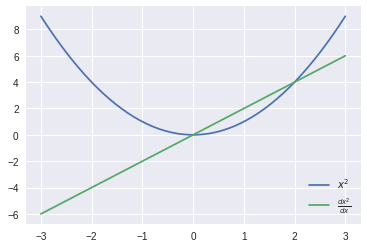

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(-3, 3)
x_squared, x_squared_der = s.run([scalar_squared, derivative[0]],
                                 {my_scalar:x})

plt.plot(x, x_squared,label="$x^2$")
plt.plot(x, x_squared_der, label=r"$\frac{dx^2}{dx}$")
plt.legend();

# Why that rocks

In [24]:
my_vector = tf.placeholder('float32', [None])
# Compute the gradient of the next weird function over my_scalar and my_vector
# Warning! Trying to understand the meaning of that function may result in permanent brain damage
weird_psychotic_function = tf.reduce_mean(
    (my_vector+my_scalar)**(1+tf.nn.moments(my_vector,[0])[1]) + 
    1./ tf.atan(my_scalar))/(my_scalar**2 + 1) + 0.01*tf.sin(
    2*my_scalar**1.5)*(tf.reduce_sum(my_vector)* my_scalar**2
                      )*tf.exp((my_scalar-4)**2)/(
    1+tf.exp((my_scalar-4)**2))*(1.-(tf.exp(-(my_scalar-4)**2)
                                    )/(1+tf.exp(-(my_scalar-4)**2)))**2

der_by_scalar = tf.gradients(weird_psychotic_function, my_scalar)
der_by_vector = tf.gradients(weird_psychotic_function, my_vector)

Instructions for updating:
Use tf.cast instead.


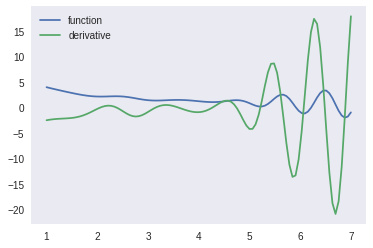

In [25]:
# Plotting the derivative
scalar_space = np.linspace(1, 7, 100)

y = [s.run(weird_psychotic_function, {my_scalar:x, my_vector:[1, 2, 3]})
     for x in scalar_space]

plt.plot(scalar_space, y, label='function')

y_der_by_scalar = [s.run(der_by_scalar,
                         {my_scalar:x, my_vector:[1, 2, 3]})
                   for x in scalar_space]

plt.plot(scalar_space, y_der_by_scalar, label='derivative')
plt.grid()
plt.legend();

# Almost done - optimizers

While you can perform gradient descent by hand with automatic gradients from above, tensorflow also has some optimization methods implemented for you. Recall momentum & rmsprop?

In [0]:
y_guess = tf.Variable(np.zeros(2, dtype='float32'))
y_true = tf.range(1, 3, dtype='float32')

loss = tf.reduce_mean((y_guess - y_true + 0.5*tf.random_normal([2]))**2) 

step = tf.train.MomentumOptimizer(0.03, 0.5).minimize(loss, var_list=y_guess)

Let's draw a trajectory of a gradient descent in 2D

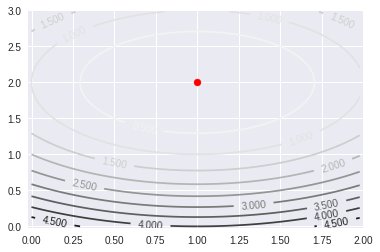

In [27]:
from matplotlib import animation, rc
import matplotlib_utils
from IPython.display import HTML, display_html

# nice figure settings
fig, ax = plt.subplots()
y_true_value = s.run(y_true)
level_x = np.arange(0, 2, 0.02)
level_y = np.arange(0, 3, 0.02)
X, Y = np.meshgrid(level_x, level_y)
Z = (X - y_true_value[0])**2 + (Y - y_true_value[1])**2
ax.set_xlim(-0.02, 2)
ax.set_ylim(-0.02, 3)
s.run(tf.global_variables_initializer())
ax.scatter(*s.run(y_true), c='red')
contour = ax.contour(X, Y, Z, 10)
ax.clabel(contour, inline=1, fontsize=10)
line, = ax.plot([], [], lw=2)

# start animation with empty trajectory
def init():
    line.set_data([], [])
    return (line,)

trajectory = [s.run(y_guess)]

# one animation step (make one GD step)
def animate(i):
    s.run(step)
    trajectory.append(s.run(y_guess))
    line.set_data(*zip(*trajectory))
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

In [28]:
try:
    display_html(HTML(anim.to_html5_video()))
except (RuntimeError, KeyError):
    # In case the build-in renderers are unaviable, fall back to
    # a custom one, that doesn't require external libraries
    anim.save(None, writer=matplotlib_utils.SimpleMovieWriter(0.001))

<source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAAA3em1kYXQAAAKuBgX//6rcRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTUyIHIyODU0IGU5YTU5MDMgLSBILjI2NC9NUEVHLTQg
QVZDIGNvZGVjIC0gQ29weWxlZnQgMjAwMy0yMDE3IC0gaHR0cDovL3d3dy52aWRlb2xhbi5vcmcv
eDI2NC5odG1sIC0gb3B0aW9uczogY2FiYWM9MSByZWY9MyBkZWJsb2NrPTE6MDowIGFuYWx5c2U9
MHgzOjB4MTEzIG1lPWhleCBzdWJtZT03IHBzeT0xIHBzeV9yZD0xLjAwOjAuMDAgbWl4ZWRfcmVm
PTEgbWVfcmFuZ2U9MTYgY2hyb21hX21lPTEgdHJlbGxpcz0xIDh4OGRjdD0xIGNxbT0wIGRlYWR6
b25lPTIxLDExIGZhc3RfcHNraXA9MSBjaHJvbWFfcXBfb2Zmc2V0PS0yIHRocmVhZHM9MyBsb29r
YWhlYWRfdGhyZWFkcz0xIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFj
ZWQ9MCBibHVyYXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMgYl9weXJh
bWlkPTIgYl9hZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0xIHdlaWdodGI9MSBvcGVuX2dvcD0wIHdl
aWdodHA9MiBrZXlpbnQ9MjUwIGtleWludF9taW49MjUgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVz
aD0wIHJjX2xvb2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9MC42MCBx
cG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAACDqZYiE
ACv//vZzfAprRzOVLgV292aj5dCS5fsQYPrQAAADAAGq1jzipe3VQKWF7ETjRY3cHV5T/gtXlZ/+
2d18I+r0/kFTKXlNaLcNEzFrZwhQJf4uAACr610vBjVHtP1Nj8TKjLJsw7zEGekryix2mXv6D5sZ
/xuVL1Zm9+ev0HB8K4dZNPqZpZjmnOt7QZ/LDpfpWAyPTERkVYbV8JPy/A3VniRgRrGJ/S9BGF6n
UtP+ypBQY6D5wKv+5XUTiS16k1YvdhnpmR+39Wk0N/Dhi1PE+6vr7iqSNNWR9T54RCdqT4Nxp66X
iH3KeDmBVXqVxZB3TJ1IGEE5cY9I0NknNsUUwqijFrHhIWcbKoqiOHcyXwfoDx0dln/LDpaRWEv9
S7xCcwgUsK2p6Mt8U98PBT9Wzw806NyFhTG4lcVYj9+RxVCZ9aYamVNbyAF3uAhnNbQ6mz/kU32D
8alq+oWPljAokjxp4PkxfxKsV+PfaUcgHn8Ih7u0ESWxO8yGoAYEeF5klx30VhIYc+fE4E1PeBvj
zPjIEC9ZSr71Z/GdBKw4yQ3eIMUB8+91A3kYzvm6s+icwLmJG89T2YNZfjDL+67kXYKAK+iijTfS
y7FnJNPGMMuHOclCOOK60fxCTGvDnvZ70NKJYuYT3Q7VxFeNjVrUqR1ZXpE6y4HM9rVdtULhDGZh
lisjR1ueuSMTeJk2NHGzppZLNuzp0la5w26Nj9rPXbDhrxOltQAbXfhhzHzxsfvnb1NViQkbNf8N
i6b5j43pr5KPX/yN0pEuNQ6J9/Vf+N0+UyylAiuc6kXIIdJT+81DqB8G0aW1hB5ycJ3drYkpmXz/
jcT0DmMNN1/qhP57SNQMzeWnyVVUbWdkNXJHIZ71XlyQu0Q3/vLhp6oC0twVPMWelyD86RAy5Kv8
fTIX0tfAXt4BT/PO2YqjQOmMkNHCbWwni2QvW/jiWb+Gr7uzcD1LOvZLKwIX0fL7T8DoAu1qqVUl
LJjdW9PXS+lK05SJyoVOqrB+vqBToV3os2VU9jxKYZ+4vgewmEvWZYsKwILGjFcEvs+tbRCsRX41
Z67c/h6lAYhLQHbRSeMXFGIQe682z4VDxgAoDKiOKEgEtK7+HaCaR1qSsEzQnqopuHwZuWPfnn6V
v36s9ZpJjFTD65IEAcCyIcJadJRWLgGQ0H9inRPWFdBT0h7/NmJSf1y3PFq5+CvMEu7tgWhHFEVv
5ZhEfhI2KsQz4tqtUaasHespUDCVbJuH7fJlHLN8wxEXgEOpQ5BEgkGexX2jfcT8Y6zrZ4EZ3fNz
SEfgYLVBZb2zcMgbcb0M/G3RrMHzPP5nxM/lCAykLksWpMtpO8F22Jd7WT8p5w/bNH+aDRrgGI6z
dpEQoVqAqnFy7kqn9fRSxOfkqqJ56t7xNX8tTm39sMzXaOu7DxiccF1G9gKr769uoBs19mguwEh9
ibBLO8lknJEbQWek4ghWRrVrE6D4eEw6nr0lQtgtbo5Dor6DwS+iIDrHP20DYo5bIaqGZPqwycIi
JfKAZLxif9AKbNcqHX5nsqXvbrif1XiYBt/wmZX1B7EaOZQ7reJdePRsqsk4+xDA8qfRV+XZotyJ
ZMuJY0ea1alDjuze85EfouH8ZSP1rtpvrHfPGX1Ew1zWSlNWYLH7ceO/YxX8j2TieJgZfSWFo/7T
xKxHNPj4v74vmTHkdrM/qdr7hD82JT7nIW8+CiLwKDKfEZqTj1SILOgfCxQwvGv0j4XJCzym4uE9
EUNmVtxi1nkLmzLB2/wT8HvckABTJUyZbQNZmSXy6iPwfwn5oERukdcSp19xPpTPWtyrW23IushY
bv53m7WcUHVp0u5QVMwaES5swcRToB+VixHwqAxW1yydd3lAzOY0w5lLAUrmtZ7U87FZmBoKLC+v
QwJ93CuGOL9SwsVTO9e9mpKiWMYb8KYNf91gJhGTfOL+CG+/pZL6hiCU/7WN+uqvEPWkfgByrsDI
uPHGb1FVVt3l+51Ok+6+rJFEBvvLpFvkcwxh2th7Zh3cJrrNt2ZQdV/Elvve9nfubvGVzRluTBDG
9zjg/RYy8JQt8AFfMxTBsGUFISFIlRVO1p9OLFdRg8OIkhLzYm1CyBlIq+lF/eJxa22USuEM1NpK
Eo3mZbwtEtU94z2uPJvs172uCai7IK4kXclXBfvNJaHxAXN6oNneDwk123SV86yjmV240NLqk4j1
/EnYPAvMUg1PPSl0gvJFDjWtjVy8OUeEQep9+mC3RdvEJaG+nYAA3iTEX3Z1PhRTgWYw3XJ24/Cf
tCgIkKgX/nZIbrOIEY5C31ebOg2sTwIZ6xFaU9KWt5kdK0Ke5K5yyhUA2wUW7Mz097IoIN3HP2vr
esYMvK/SLipz5n9pzsgAU8bSztAc3Q46PEQZDnzhhVt3UO9ClqlKO29E8ro4UP8iDYGX9uvdKJA8
EEUjWLcqrwkC8D4ZCkzmqZm6nSfqfRlN8vKVehIyYzn/ygnbLinQHa/OB3JFIF8WzqV6/blPi1Mp
JFv5EQy8GRnfWMlmA3ePzNidm0nkvUzw1SJLgot03HAM6jmmD+V1MDxlk9+7dl7ndct8v1WeMmcx
6S3KfDUolocLUuAFK6nnzuOrM3G+l5hrMK8spnQuw0P2/qBU7UL9yM209mYWXdBF0SRRVv8NA4Iy
5Er7ZM8ptUpDp7NXiCbmOObGy4qZifhNQHggOg/HlcZSX/0qFcw6uB0nmoZ+jDNqYE966qLYyrgb
x4RGlRdHriMiEfu/s83bQc5JnRGDKGBD2ITzJ+Nqu9ogViEcA+s63ohmxYZ5UUVYuTAVadll5RAT
dBYmBVRmrI/mr//chDsRq0S+htV9BvR0ocUg6Oo2Xcum8n+8Ttahf4932XUQsgFP44fRljxan8ki
mA4/QU14hPqGESQCCCFjH